episodic_only
- mean 46.32
- std 3.85

semantic_only
- mean 56.84
- std 1.23

random
- mean 35.6 
- std 4.90

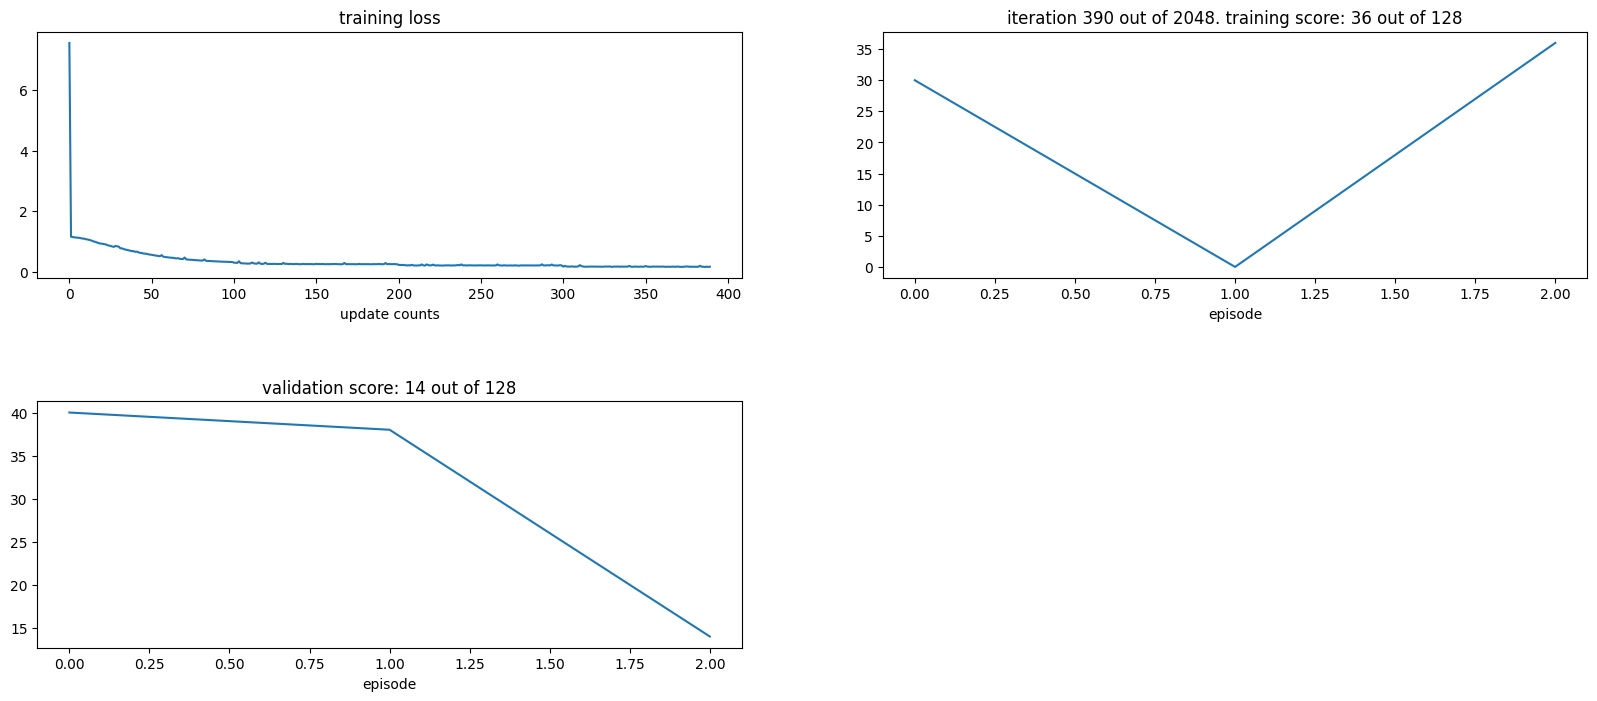

In [1]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent import DQNAgent, HandcraftedAgent

# parameters
all_params = {
    "env_str": "room_env:RoomEnv-v1",
    "gamma": 0.65,
    "capacity": {"episodic": 16, "semantic": 16, "short": 1},
    "nn_params": {
        "hidden_size": 64,
        "num_layers": 2,
        "n_actions": 3,
        "embedding_dim": 32,
        "include_human": "sum",
    },
    "num_iterations": 128 * 16,
    "replay_buffer_size": 128 * 16,
    "batch_size": 128,
    "target_update_rate": 100,
    "pretrain_semantic": False,
    "run_validation": True,
    "run_test": True,
    "num_samples_for_results": 10,
    "train_seed": 0,
    "plotting_interval": 10,
    "device": "cpu",
    "test_seed": 5,
    # PER parameters
    "alpha": 0.2,
    "beta": 0.6,
    "prior_eps": 1e-6,
    # Categorical DQN parameters
    "v_min": 0.0,
    "v_max": 200.0,
    "atom_size": 51,
    # N-step Learning
    "n_step": 3,
}

agent = DQNAgent(**all_params)
agent.train()


In [9]:
agent.scores["test"]


[40, 22, 28, 36, 56, 54, 6, 54, 6, 40]

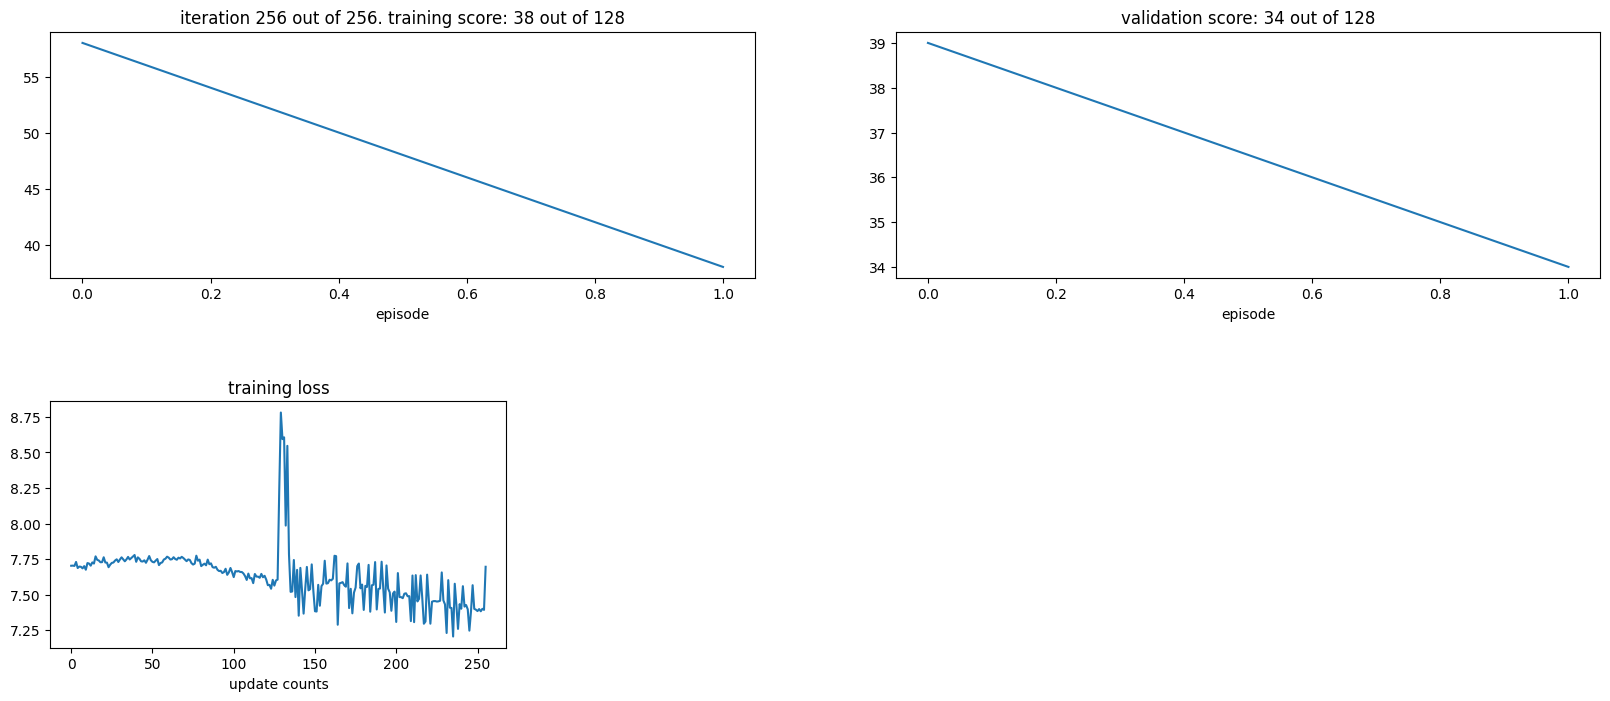

In [7]:
agent._plot()


In [2]:
128 * 8


1024

In [3]:
agent.memory_systems


{'episodic': {   '_frozen': False,
     'capacity': 16,
     'entries': [   {   'human': 'Alexander',
                        'object': 'keyboard',
                        'object_location': 'desk',
                        'timestamp': 0}],
     'remove_duplicates': False,
     'type': 'episodic'},
 'semantic': {   '_frozen': False,
     'capacity': 16,
     'entries': [   {   'num_generalized': 1,
                        'object': 'oven',
                        'object_location': 'home'},
                    {   'num_generalized': 1,
                        'object': 'bird',
                        'object_location': 'tree'},
                    {   'num_generalized': 1,
                        'object': 'car',
                        'object_location': 'city'},
                    {   'num_generalized': 1,
                        'object': 'bicycle',
                        'object_location': 'garage'},
                    {   'num_generalized': 1,
                        'object': 

In [4]:
# for test_seed in [0, 1, 2, 3, 4]:
#     all_params = {
#         "env_str": "room_env:RoomEnv-v1",
#         "policy": "semantic_only",
#         "num_samples_for_results": 10,
#         "capacity": {"episodic": 0, "semantic": 32, "short": 1},
#         "test_seed": test_seed,
#     }
#     all_params["test_seed"] = test_seed
#     agent = HandcraftedAgent(**all_params)
#     agent.test()


In [5]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/episodic_only_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


46.32000000000001 3.848324310657823


In [6]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/semantic_only_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


56.839999999999996 1.2799999999999994


In [7]:
from glob import glob
import yaml
import numpy as np

results = glob("./training_results/random_agent/*/results.yaml")
scores = []
for file in results:
    with open(file, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)

    scores.append(results["test_score"]["mean"])
print(np.mean(scores), np.std(scores))


35.6 4.90061220665337


In [8]:
# heights: 50.4, stds: 8.429
# heights: 58.0, stds: 9.381
# heights: 33.8, stds: 9.569
# heights: 89.32000122070312, stds: 4.021143669546528
# heights: 110.71999969482422, stds: 3.5181795198362273
